In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load data
bayes_vr_dir = 'bayes_data.csv'
norm_vr_dir = 'norm_data.csv'
bayes_vr = pd.read_csv(bayes_vr_dir)
norm_vr = pd.read_csv(norm_vr_dir)

In [6]:
y_5 = norm_vr['username'].tolist()
y_6 = norm_vr['typer_user'].tolist()
y_7 = bayes_vr['typer_user'].tolist()
y_8 = bayes_vr['username'].tolist()

In [7]:
users = set(y_5)
users.update(y_6)
users.update(y_7)
users.update(y_8)
user_to_num = {}
num_to_user = {}


In [8]:
for i in enumerate(users):
  user_to_num[i[1]] = i[0]
  num_to_user[i[0]] = i[1]

In [9]:
def convert_to_np(lista, user_to_num):
  vettore = [user_to_num[i] for i in lista]
  return np.array(vettore)

In [10]:
bayes_vr_y = convert_to_np(y_8, user_to_num)
bayes_vr_y_pred = convert_to_np(y_7, user_to_num)

In [11]:
norm_vr_y = convert_to_np(y_5, user_to_num)
norm_vr_y_pred = convert_to_np(y_6, user_to_num)

In [12]:
bayes_values = bayes_vr["score"].tolist()
norm_values = norm_vr["score"].tolist()
print(bayes_values)
print(norm_values)
     

[7.617208753313337, 7.515210832868305, 7.644283839634487, 7.498672485351562, 7.657768794468471, 7.235296521868024, 7.512932368687221, 7.668695722307477, 7.536210196358817, -0.3415626798357282, -0.4438263348170689, -0.6159859384809222, -0.2420503752572195, 6.731988089425223, 6.771512712751116, 4.898677280970982, 7.621406010219029, 9.28665052141462, 0.6900373186383929, 4.947157723563059, 3.99606078011649, -0.5283829144069127, 0.6788805552891323, 2.6951070513044084, 4.281032289777484, 0.7435568400791713, 9.168890816824776, 9.9389157976423, 9.944129943847658, 8.181712559291295, 9.727180480957031, 10.061673845563616, 5.959642682756697, -0.4669204098837716, 2.898603711809431, 0.2351019723074776, -6.976276942661831, 0.487830707005092, 0.2217435155596052, 0.4627187592642647, 1.861746106828962, 1.874636513846261, -1.957049233572824, -0.1840590749468122, 1.8332129887172155, 6.605536324637277, 5.638493129185269, 6.350955963134766, 6.631105150495257, 6.580624171665737, 4.676131112234933, 7.5166636

In [13]:
# function to get the list of impostor attempts
def get_impostors(df):
    impostors_values = []
    genuine_values = []
    for index, row in df.iterrows():
      if row["typer_user"] != row["username"]:
        impostors_values.append(row["score"])
      else:
        genuine_values.append(row["score"])
    return impostors_values, genuine_values

bayes_impostor_values, bayes_genuine_values = get_impostors(bayes_vr)
norm_impostor_values, norm_genuine_values = get_impostors(norm_vr)

In [14]:
print("impostor len: ", len(bayes_impostor_values))
print("genuine len: ", len(bayes_values) - len(bayes_impostor_values))

impostor len:  87
genuine len:  52


In [15]:
def get_norm_results(values, threshold):
  accepted = 0
  rejected = 0
  for value in values:
    if value < threshold:
      accepted += 1
    else:
      rejected += 1
  return accepted, rejected

def get_bayes_results(values, threshold):
  accepted = 0
  rejected = 0
  for value in values:
    if value > threshold:
      accepted += 1
    else:
      rejected += 1
  return accepted, rejected

In [16]:
min_norm = min(norm_values)
max_norm = max(norm_values)
min_bayes = min(bayes_values)
max_bayes = max(bayes_values)

norm_step = (max_norm - min_norm) / len(norm_values)
bayes_step = (max_bayes - min_bayes) / len(bayes_values)

norm_thresholds = [(min_norm + (norm_step * i)) / 20 for i in range(0, len(norm_values) + 1)]
bayes_thresholds = [min_bayes + (bayes_step * i) for i in range(0, len(bayes_values) + 1)]
                                                             
print(norm_thresholds)
print(bayes_thresholds)

[0.00028715496882796, 0.003545943700937902, 0.006804732433047844, 0.010063521165157786, 0.013322309897267728, 0.01658109862937767, 0.01983988736148761, 0.023098676093597555, 0.026357464825707493, 0.029616253557817433, 0.032875042289927374, 0.03613383102203732, 0.03939261975414726, 0.0426514084862572, 0.04591019721836715, 0.04916898595047709, 0.05242777468258704, 0.05568656341469698, 0.05894535214680692, 0.06220414087891686, 0.0654629296110268, 0.06872171834313676, 0.0719805070752467, 0.07523929580735664, 0.07849808453946658, 0.08175687327157652, 0.08501566200368646, 0.0882744507357964, 0.09153323946790634, 0.09479202820001628, 0.09805081693212622, 0.10130960566423616, 0.1045683943963461, 0.10782718312845604, 0.11108597186056599, 0.11434476059267593, 0.11760354932478587, 0.12086233805689581, 0.12412112678900575, 0.1273799155211157, 0.13063870425322563, 0.1338974929853356, 0.13715628171744554, 0.14041507044955548, 0.14367385918166542, 0.14693264791377536, 0.1501914366458853, 0.1534502253

In [17]:
print(np.median(norm_thresholds))


0.225143577484414


In [18]:
print(np.median(bayes_thresholds))

-4.220572226388114


In [19]:
bayes_far_rates = []
bayes_frr_rates = []
for threshold in bayes_thresholds:

  false_positive, true_negative = get_bayes_results(bayes_impostor_values, threshold)
  bayes_far_rates.append(false_positive / (false_positive + true_negative))

  true_positive, false_negative = get_bayes_results(bayes_genuine_values, threshold)
  bayes_frr_rates.append(false_negative / (false_negative + true_positive))
  
print(bayes_far_rates)
print(bayes_frr_rates)

[0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368, 0.9885057471264368,

In [20]:
norm_far_rates = []
norm_frr_rates = []
for threshold in norm_thresholds:

  false_positive, true_negative = get_norm_results(norm_impostor_values, threshold)
  norm_far_rates.append(false_positive / (false_positive + true_negative))

  true_positive, false_negative = get_norm_results(norm_genuine_values, threshold)
  norm_frr_rates.append(false_negative / (false_negative + true_positive))
  
print(norm_far_rates)
print(norm_frr_rates)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.022988505747126436, 0.022988505747126436, 0.04597701149425287, 0.05747126436781609, 0.06896551724137931, 0.06896551724137931, 0.10344827586206896, 0.11494252873563218, 0.13793103448275862, 0.14942528735632185, 0.1724137931034483, 0.1839080459770115, 0.21839080459770116, 0.3103448275862069, 0.3103448275862069, 0.3218390804597701, 0.39080459770114945, 0.42528735632183906, 0.4482758620689655, 0.5057471264367817, 0.5517241379310345, 0.5977011494252874, 0.632183908045977, 0.6551724137931034, 0.6781609195402298, 0.735632183908046, 0.7701149425287356, 0.7816091954022989, 0.8275862068965517, 0.8390804597701149, 0.8505747126436781, 0.8505747126436781, 0.8505747126436781, 0.8620689655172413, 0.8735632183908046, 0.8735632183908046, 0.8735632183908046, 0.8850574712643678, 0.8850574712643678, 0.8850574712643678, 0.8850574712643678, 0.8850574712643678, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.896551724137931, 0.8965517241379

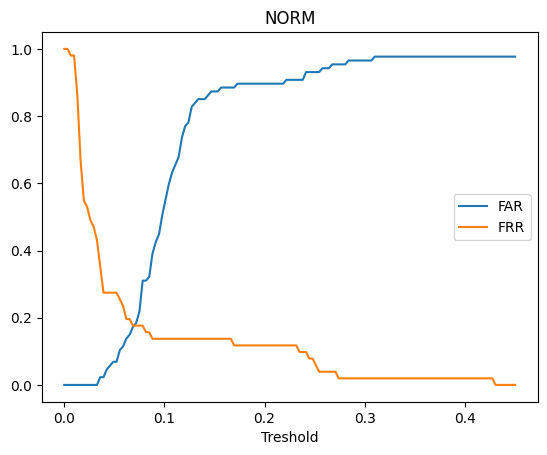

In [21]:

plt.title("NORM")
plt.plot(norm_thresholds, norm_far_rates, label='FAR')
plt.plot(norm_thresholds, norm_frr_rates, label='FRR')
plt.legend()
plt.xlabel("Treshold")
plt.show()

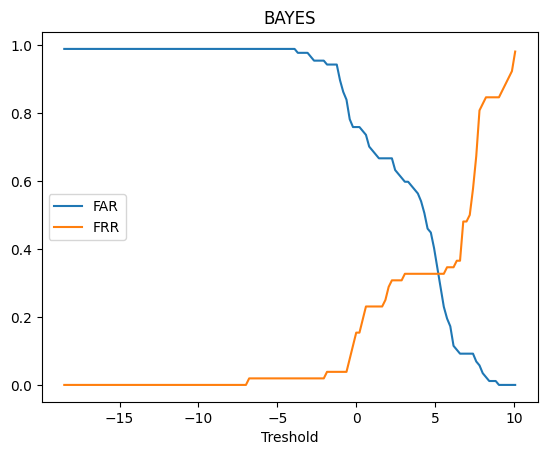

In [22]:

plt.title("BAYES")
plt.plot(bayes_thresholds, bayes_far_rates, label='FAR')
plt.plot(bayes_thresholds, bayes_frr_rates, label='FRR')
plt.legend()
plt.xlabel("Treshold")
plt.show()
     

In [1]:
hter_norm = [((norm_far_rates[i] +  norm_frr_rates[i]) / 2) for i in range(len(norm_frr_rates))]
plt.title("NORM")
plt.ylabel("HTER")
plt.xlabel("threshold")
plt.plot(hter_norm, "blue")
plt.show()

NameError: name 'norm_frr_rates' is not defined